# USG grants crawl
## NSF grant award data ingest

### Motive

In previous chapters we looked at the sum total of grant data provided by [grants.gov](https://www.grants.gov/web/grants).  We noticed some shortcomings with it, including varying lengths of grant program descriptions, and varying levels of reliabiltiy in the records themselves.  As such, we might be inclined to search for a better curated resource that could still shed light on open science infrastructure investments.

One potential resource would be the grant **awards** for a specific agency.  Hopefully the agency maintains more complete records of their own grant awards.  These records might be more detailed, in that the descriptions are richer, and there might be more metadata associated with the records.  Presumably, these records would be stored in a standard format that is specific to this agency.  In a sense, this presents a slight challenge to our broader investigation, in that the various agencies likely have different data schemas, but there's not much we can do about that for now.  In any case, it is quite possible that specific agencies have this same curiosity about their own open science infrastructure investments, and this more tailored approach can help adress those.

### A biased choice

For this particular attempt we will go with the National Science Foundation (NSF), as indicated by the heading of this notebook.  Fortunate for us the NSF maintains a [specific download resource](https://www.nsf.gov/awardsearch/download.jsp) for their grant awards stretching back to 1959 and beyond.  This is what we will make use of.

#### An aside on the approach

Because we have already gone over the process of downloading and formatting the relevant data in previous chapters, we will skip those steps for now.  If you are curious about how this is being done (e.g. specifically for the NSF's setup) feel free to look at the code in the ['src/'] folder of this repository.

### Initial database load

Lets go ahead and display the data as a dataframe.

NOTE: if you do not have the data downloaded locally, the following code block will detect the absence of the data in the current repository directory structure and will download and reformat it accordingly.  Once unpacked and reformatted, the file should contain about 500,000 grant records and take up about 3 GB.

In [1]:
# import our helper functions
import sys
import os
import glob
import json
import subprocess
# find the head directory of the repo


def getGitRoot():
    return subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')

sys.path.insert(0, getGitRoot() + '/src')
sys.path.insert(0, getGitRoot() + '/inputData')
# import our helper functions
import grantsGov_utilities as grantsGov_utilities

expectedDataDir=getGitRoot() + '/inputData'

# find the path to the local json file if it exists
nsfGrantsJSONpath=grantsGov_utilities.detectLocalNSFData(dataDirectory=expectedDataDir+'/NSF_grant_data/')

# take the json file path, load it, and convert it to a dataframe
# start by loading the json file   
# next convert the json file to a dataframe
nsfGrantsDF=grantsGov_utilities.NSFjson2DF(nsfGrantsJSONpath)
# print the first 10 rows of the dataframe
nsfGrantsDF.head(10)

The local NSF grant data was found at /media/dan/HD4/coding/gitDir/USG_grants_crawl/inputData/NSF_grant_data/NSF_grants.json.
Attempting load of /media/dan/HD4/coding/gitDir/USG_grants_crawl/inputData/NSF_grant_data/NSF_grants.json
Loading .json file/media/dan/HD4/coding/gitDir/USG_grants_crawl/inputData/NSF_grant_data/NSF_grants.json


,AwardTitle,AGENCY,AwardEffectiveDate,AwardExpirationDate,AwardTotalIntnAmount,AwardAmount,AwardInstrument,Organization,ProgramOfficer,AbstractNarration,...,Investigator,Institution,Performance_Institution,ProgramElement,ProgramReference,FUND_OBLG,Appropriation,Fund,POR,FoaInformation
0,Systematics of Arachnids Using Whole Mitochond...,NSF,09/01/2004,08/31/2009,0.00,317548,{'Value': 'Standard Grant'},"{'Code': '08010206', 'Directorate': {'Abbrevia...","{'SignBlockName': 'Judith Skog', 'PO_EMAI': No...",&lt;br/&gt;&lt;br/&gt;ABSTRACT&lt;br/&gt;DEB 0...,...,"[{'FirstName': 'Susan', 'LastName': 'Masta', '...","{'Name': 'Portland State University', 'CityNam...","{'Name': 'Portland State University', 'CityNam...","[{'Code': '1171', 'Text': 'PHYLOGENETIC SYSTEM...","[{'Code': '1171', 'Text': 'PHYLOGENETIC SYSTEM...","[2004~299998, 2005~11550, 2006~6000]",NaN,NaN,NaN,NaN
1,CAREER: Rapid host-parasite evolution and its ...,NSF,09/01/2012,04/30/2017,678721.00,746459,{'Value': 'Continuing Grant'},"{'Code': '08010208', 'Directorate': {'Abbrevia...","{'SignBlockName': 'Douglas Levey', 'PO_EMAI': ...",As rates of parasitism increase and species in...,...,"{'FirstName': 'Meghan', 'LastName': 'Duffy', '...",{'Name': 'Regents of the University of Michiga...,"{'Name': 'University of Michigan Ann Arbor', '...","[{'Code': '1182', 'Text': 'POP & COMMUNITY ECO...","[{'Code': '1045', 'Text': 'CAREER-Faculty Erly...","[2011~82637, 2012~157512, 2013~211950, 2014~15...","[{'Code': '0111', 'Name': 'NSF RESEARCH & RELA...","[{'Code': '01001112DB', 'Name': 'NSF RESEARCH ...","{'DRECONTENT': '<div class=""porColContainerWBG...",NaN
2,DISSERTATION RESEARCH: The influence of wildfi...,NSF,06/01/2014,05/31/2015,19590.00,19590,{'Value': 'Standard Grant'},"{'Code': '08010209', 'Directorate': {'Abbrevia...","{'SignBlockName': 'Henry L. Gholz', 'PO_EMAI':...",Although wildfires are important disturbances ...,...,"[{'FirstName': 'Mažeika', 'LastName': 'Sullivá...","{'Name': 'Ohio State University', 'CityName': ...","{'Name': 'Ohio State University', 'CityName': ...","{'Code': '1181', 'Text': 'ECOSYSTEM STUDIES'}","[{'Code': '9169', 'Text': 'BIODIVERSITY AND EC...",2014~19590,"{'Code': '0114', 'Name': 'NSF RESEARCH & RELAT...","{'Code': '01001415DB', 'Name': 'NSF RESEARCH &...","{'DRECONTENT': '<div class=""porColContainerWBG...",NaN
3,Direct Conversion of Carbon into Q-carbon and ...,NSF,09/01/2017,08/31/2020,238995.00,286495,{'Value': 'Standard Grant'},"{'Code': '03070000', 'Directorate': {'Abbrevia...","{'SignBlockName': 'Lynnette Madsen', 'PO_EMAI'...",NON-TECHNICAL DESCRIPTION: This project focuse...,...,"{'FirstName': 'Jagdish', 'LastName': 'Narayan'...","{'Name': 'North Carolina State University', 'C...","{'Name': 'North Carolina State University', 'C...","{'Code': '1774', 'Text': 'CERAMICS'}","[{'Code': '7237', 'Text': 'NANO NON-SOLIC SCI ...","[2017~238995, 2020~47500]","[{'Code': '0117', 'Name': 'NSF RESEARCH & RELA...","[{'Code': '01001718DB', 'Name': 'NSF RESEARCH ...","{'DRECONTENT': '<div class=""porColContainerWBG...",NaN
4,MRI: Acquisition of a GPU Accelerated Vermont ...,NSF,09/01/2018,08/31/2020,893120.00,893120,{'Value': 'Standard Grant'},"{'Code': '05090000', 'Directorate': {'Abbrevia...","{'SignBlockName': 'Alejandro Suarez', 'PO_EMAI...",This project will enable interdisciplinary sci...,...,"[{'FirstName': 'Joshua', 'LastName': 'Bongard'...",{'Name': 'University of Vermont & State Agricu...,{'Name': 'University of Vermont & State Agricu...,"{'Code': '1189', 'Text': 'Major Research Instr...","[{'Code': '026Z', 'Text': 'NSCI: National Stra...",2018~893120,"[{'Code': '0117', 'Name': 'NSF RESEARCH & RELA...","[{'Code': '01001718DB', 'Name': 'NSF RESEARCH ...","{'DRECONTENT': '<div class=""porColContainerWBG...",NaN
5,The Origins And Impact Of Modern Human Diets,NSF,02/01/2015,01/31/2017,34269.00,34269,{'Value': 'Standard Grant'},"{'Code': '04040000', 'Directorate': {'Abbrevia...","{'SignBlockName': 'John Yellen', 'PO_EMAI': 'j...",This research f

### What does a grant record look like

There are a great many fields / columns in the dataframe, lets print each of these and their types.

In [2]:
# for each column in the dataframe, print the column name, the first value, and the inferred data type
for col in nsfGrantsDF.columns:
    print(col, nsfGrantsDF[col].iloc[0], type(nsfGrantsDF[col].iloc[0]))

AwardTitle Systematics of Arachnids Using Whole Mitochondrial Genomes <class 'str'>
AGENCY NSF <class 'str'>
AwardEffectiveDate 09/01/2004 <class 'str'>
AwardExpirationDate 08/31/2009 <class 'str'>
AwardTotalIntnAmount 0.00 <class 'str'>
AwardAmount 317548 <class 'str'>
AwardInstrument {'Value': 'Standard Grant'} <class 'dict'>
Organization {'Code': '08010206', 'Directorate': {'Abbreviation': 'BIO', 'LongName': 'Direct For Biological Sciences'}, 'Division': {'Abbreviation': 'DEB', 'LongName': 'Division Of Environmental Biology'}} <class 'dict'>
ProgramOfficer {'SignBlockName': 'Judith Skog', 'PO_EMAI': None, 'PO_PHON': None} <class 'dict'>
AbstractNarration &lt;br/&gt;&lt;br/&gt;ABSTRACT&lt;br/&gt;DEB 0416628&lt;br/&gt;Masta&lt;br/&gt;&lt;br/&gt;A grant has been awarded to Dr. Susan Masta of Portland State University and her colleague Dr. Jeffrey Boore (DOE Joint Genome Institute) to examine phylogenetic relationships among the 11 orders of arachnids (spiders, mites, scorpions, and rel

### How good is the data

Now that we have the data in a dataframe, let's count the number of empty or null values for each.

In [3]:
import numpy as np
# iterate across the columns and count how many null, empty, '', zero, or NaN values are in each column
for col in nsfGrantsDF.columns:
    print(col, str(np.sum(nsfGrantsDF[col].map(lambda x: grantsGov_utilities.isempty(x)))))

AwardTitle 28
AGENCY 97017
AwardEffectiveDate 0
AwardExpirationDate 0
AwardTotalIntnAmount 52237
AwardAmount 478
AwardInstrument 0
Organization 0
ProgramOfficer 0
AbstractNarration 111207
MinAmdLetterDate 546
MaxAmdLetterDate 546
ARRAAmount 498415
TRAN_TYPE 97018
CFDA_NUM 104848
NSF_PAR_USE_FLAG 97018
FUND_AGCY_CODE 97018
AWDG_AGCY_CODE 97018
AwardID 1
Investigator 1746
Institution 559
Performance_Institution 97174
ProgramElement 16043
ProgramReference 148804
FUND_OBLG 99492
Appropriation 277766
Fund 315608
POR 392057
FoaInformation 236198


### Quick inspection of the "AbstractNarration" field

Now that we have a better sense of the data set, let's look a bit closer at the specific field that will have the description of the grant award / project.  If we're going to be looking for our keywords in this field, we should get a sense of how many words are typically in this field.  Note that we're leaving out 0 of the histogram as there are 111207 grants awards that would have a count of zero (per our previous check), which would swamp the figure.

(array([4.540e+02, 1.080e+02, 4.380e+02, 4.800e+01, 2.600e+01, 7.200e+01,
        5.200e+01, 7.500e+01, 9.800e+01, 1.130e+02, 1.580e+02, 2.420e+02,
        2.130e+02, 2.770e+02, 3.270e+02, 4.360e+02, 5.370e+02, 5.220e+02,
        6.140e+02, 6.750e+02, 8.020e+02, 9.030e+02, 9.530e+02, 1.023e+03,
        1.084e+03, 1.131e+03, 1.335e+03, 1.417e+03, 1.779e+03, 1.542e+03,
        1.589e+03, 1.738e+03, 1.887e+03, 1.777e+03, 1.955e+03, 2.096e+03,
        1.957e+03, 2.119e+03, 2.241e+03, 2.213e+03, 2.153e+03, 2.120e+03,
        2.250e+03, 2.255e+03, 2.211e+03, 2.586e+03, 2.323e+03, 2.353e+03,
        2.445e+03, 2.407e+03, 2.447e+03, 2.448e+03, 2.478e+03, 2.577e+03,
        2.602e+03, 2.617e+03, 2.680e+03, 2.616e+03, 2.692e+03, 2.783e+03,
        2.768e+03, 2.792e+03, 2.843e+03, 2.915e+03, 2.883e+03, 3.049e+03,
        3.163e+03, 3.145e+03, 3.124e+03, 3.222e+03, 3.113e+03, 3.047e+03,
        2.926e+03, 3.048e+03, 2.992e+03, 3.001e+03, 3.023e+03, 2.847e+03,
        2.992e+03, 3.014e+03, 2.986e+0

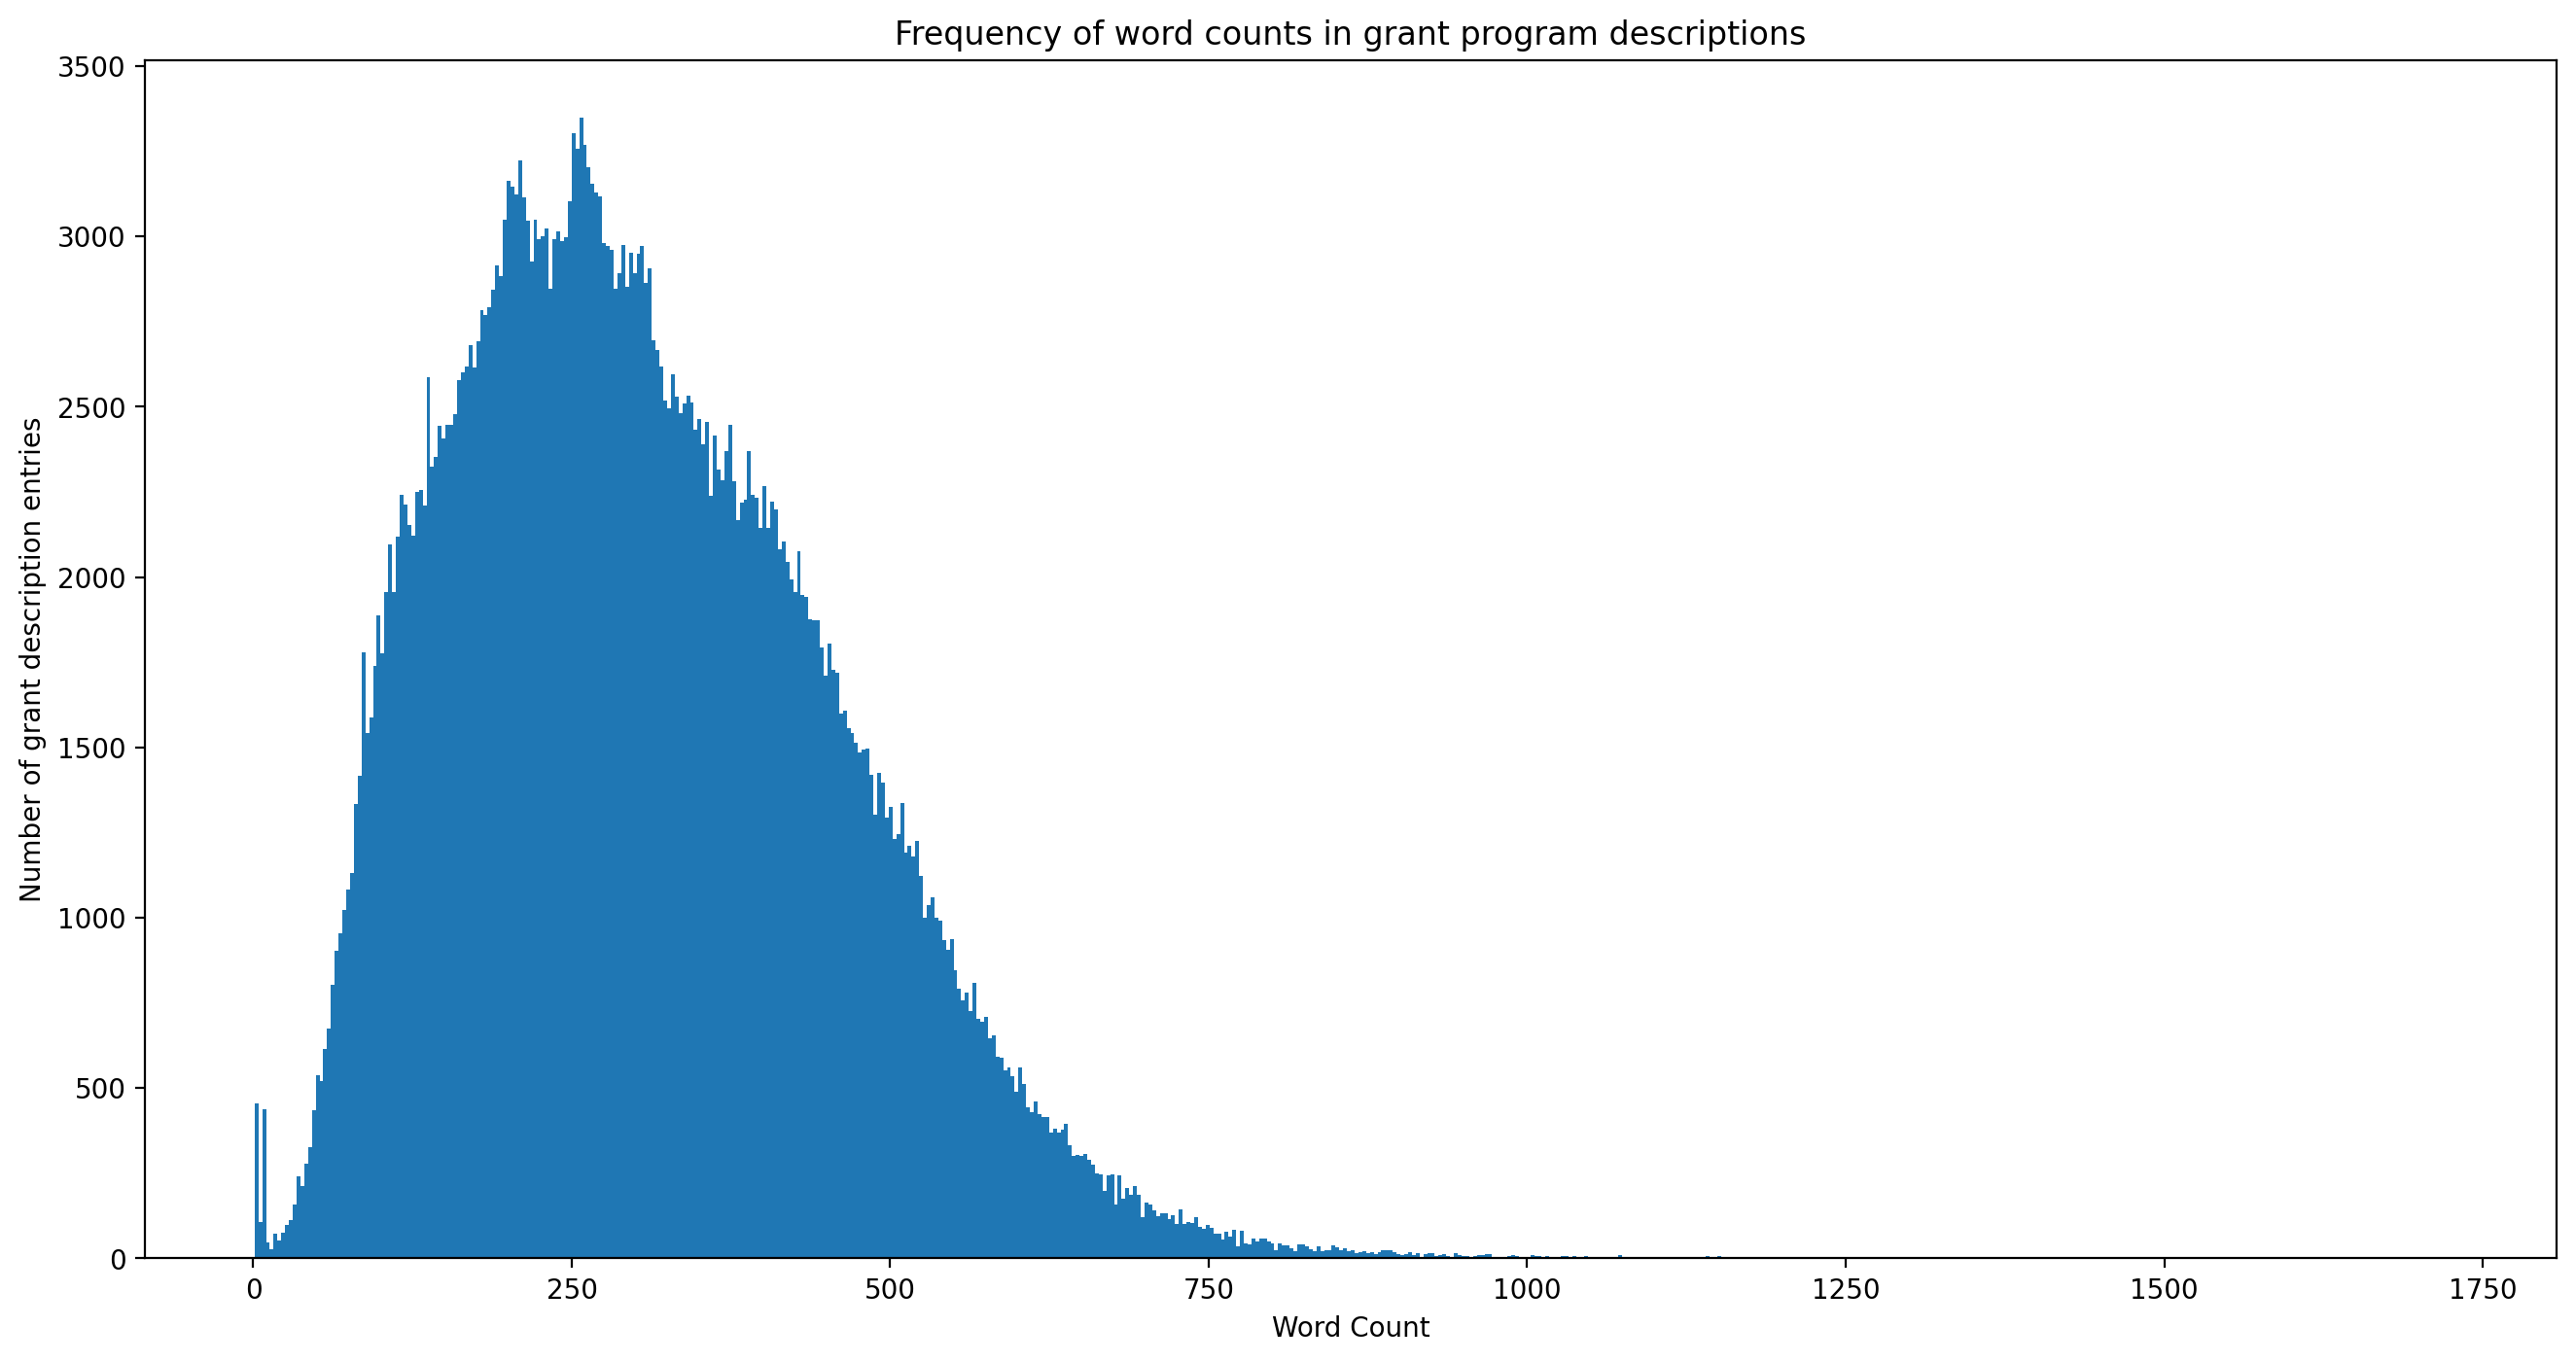

In [9]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
# create a holder to hold the word count
wordCounts=np.zeros(len(nsfGrantsDF))
for iIndexes,iRows in nsfGrantsDF.iterrows():
    # get the description content for the current row
    currDescription=iRows['AbstractNarration']
    # perform a regex search and count the number of matches IF THERE'S ANY WORDS THERE
    if not pd.isnull(currDescription):
        currDescWordCount = len(re.findall(re.compile('\\b[A-Za-z]+\\b'), currDescription))
    else:
        currDescWordCount=0
    # set it in the holder
    wordCounts[iIndexes]=currDescWordCount

# seaborn makes this overcomplicated, so just use matplotlib
binSize=3
binNumber=math.ceil(np.max(wordCounts)/binSize)
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Frequency of word counts in grant program descriptions')
plt.xlabel('Word Count')
plt.ylabel('Number of grant description entries')
plt.hist(wordCounts,bins=binNumber,range=(1,binNumber*binSize))

### What about open science infrastructure?

When we originally used the [grants.gov](https://www.grants.gov/web/grants) data we next looked at agency information by word information, and then moved into looking within agencies for their usage patterns.  In the next notebook, we'll skip this intermediary tsep and go straight to looking within divisions.